In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [4]:
print("\
First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [6]:
print("\
Missing values:")
print(df.isnull().sum())

Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
categorical_columns = ['Gender', 'Product Category']
for col in categorical_columns:
    print(f"\
Unique values in {col}:")
    print(df[col].value_counts())

Unique values in Gender:
Gender
Female    510
Male      490
Name: count, dtype: int64
Unique values in Product Category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [8]:
import seaborn as sns
from datetime import datetime

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.sort_values('Date')

In [11]:
df.set_index('Date', inplace=True)

In [12]:
daily_sales = df.resample('D')['Total Amount'].sum()


In [13]:
monthly_sales = df.resample('M')['Total Amount'].sum()


In [14]:
daily_category_sales = df.groupby([df.index, 'Product Category'])['Total Amount'].sum().unstack()


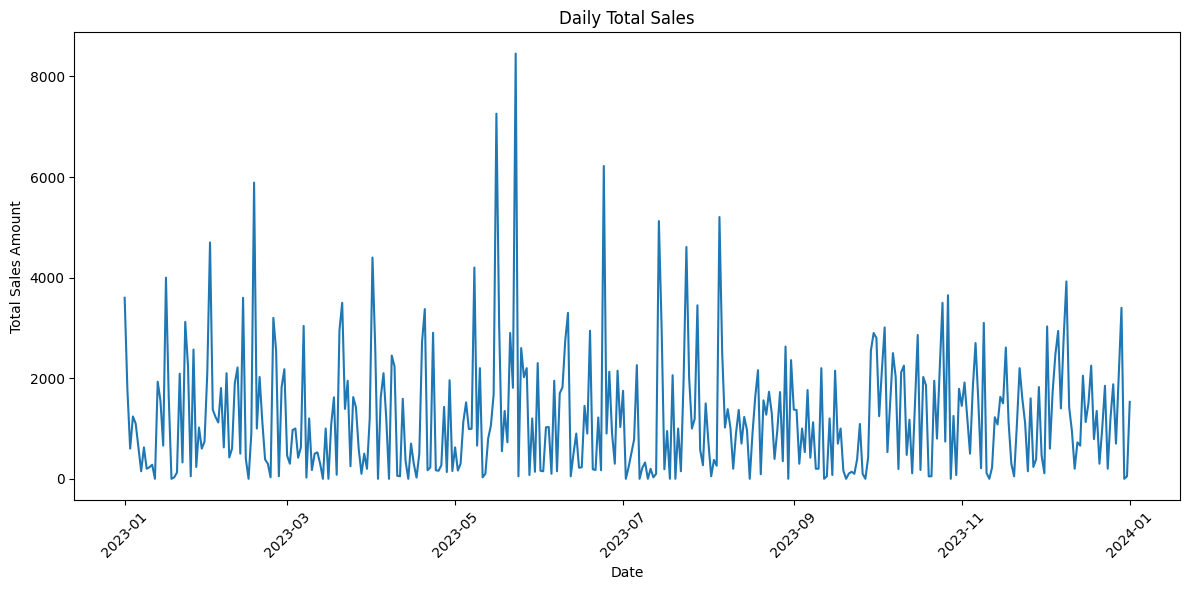

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_sales.png')
plt.show()

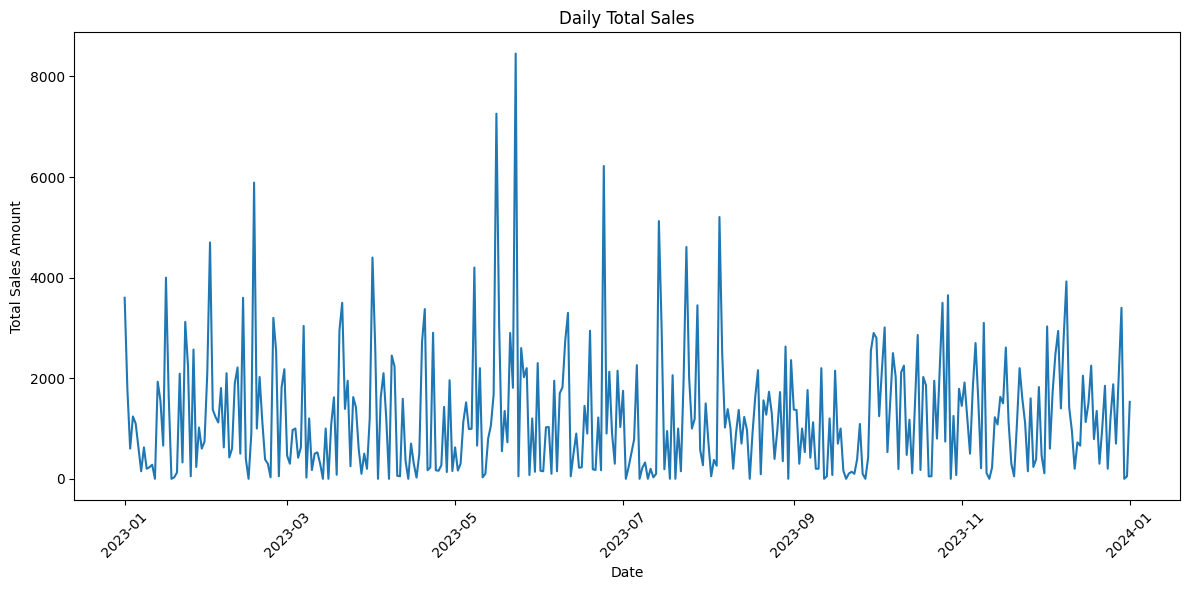

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_sales.png')
plt.show()

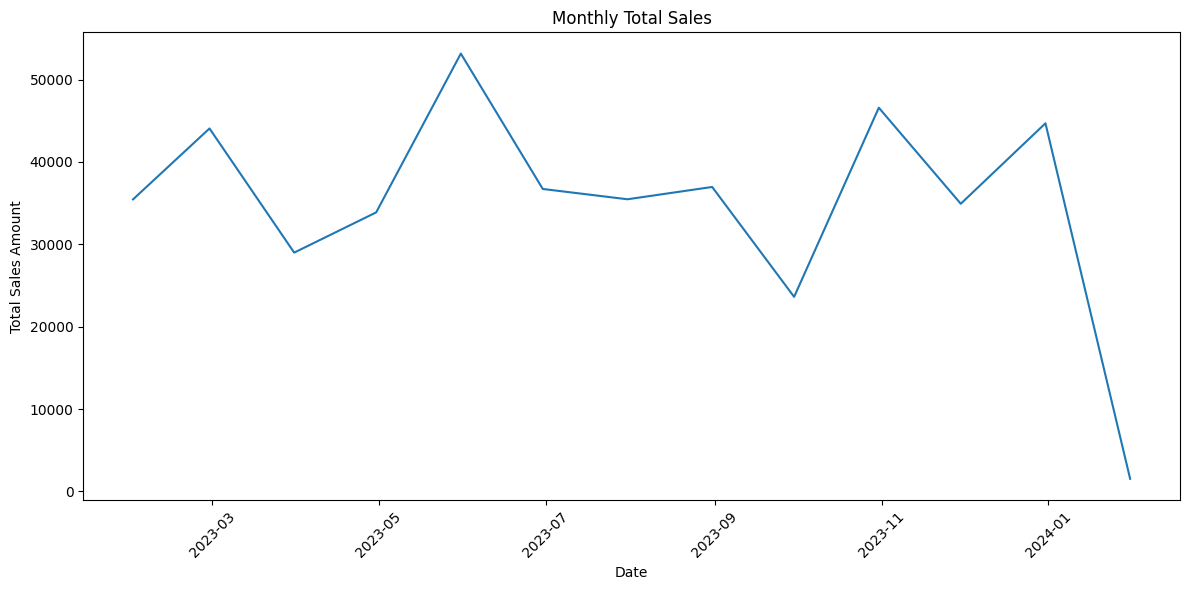

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales.png')
plt.show()


<Figure size 1200x600 with 0 Axes>

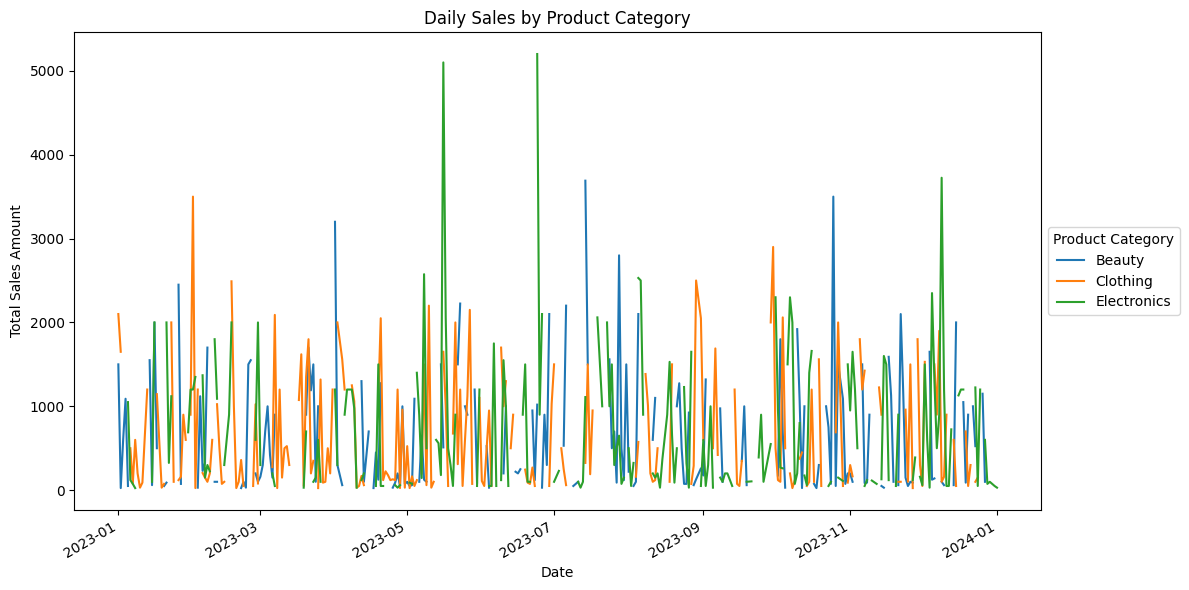

In [26]:
plt.figure(figsize=(12, 6))
daily_category_sales.plot(figsize=(12, 6))
plt.title('Daily Sales by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('daily_category_sales.png')
plt.show()


In [19]:
total_sales = df['Total Amount'].sum()
avg_daily_sales = daily_sales.mean()
avg_monthly_sales = monthly_sales.mean()
best_selling_day = daily_sales.idxmax()
worst_selling_day = daily_sales.idxmin()
best_selling_month = monthly_sales.idxmax()
worst_selling_month = monthly_sales.idxmin()


In [20]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

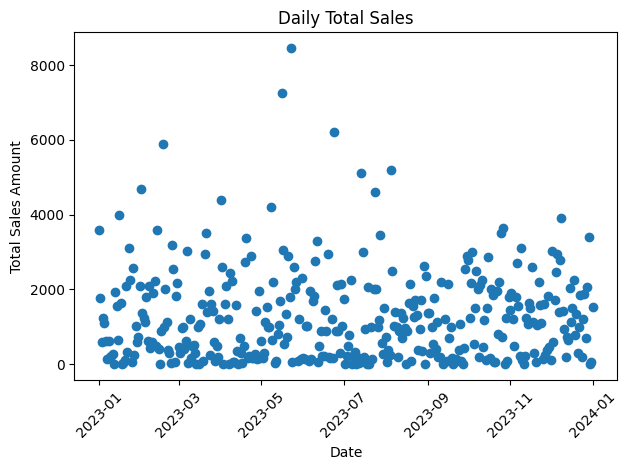

In [22]:
plt.scatter(daily_sales.index, daily_sales.values)
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_sales.png')
plt.show()

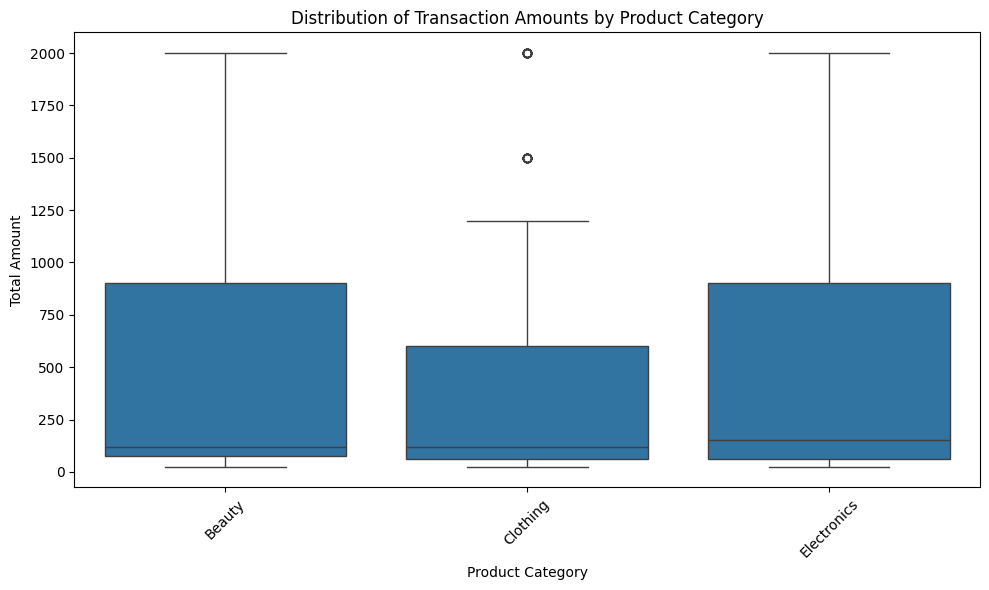

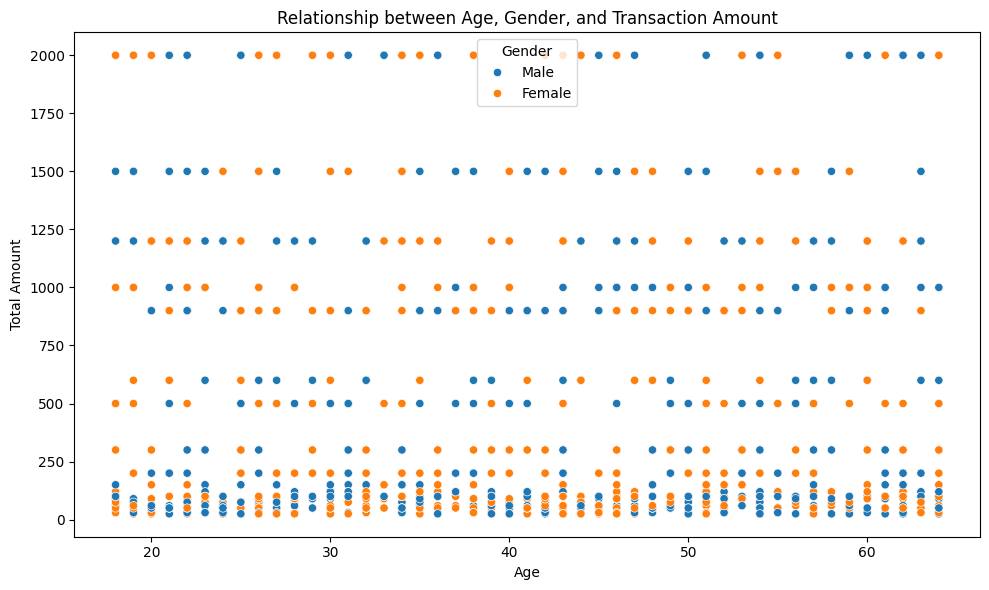

<Figure size 1000x600 with 0 Axes>

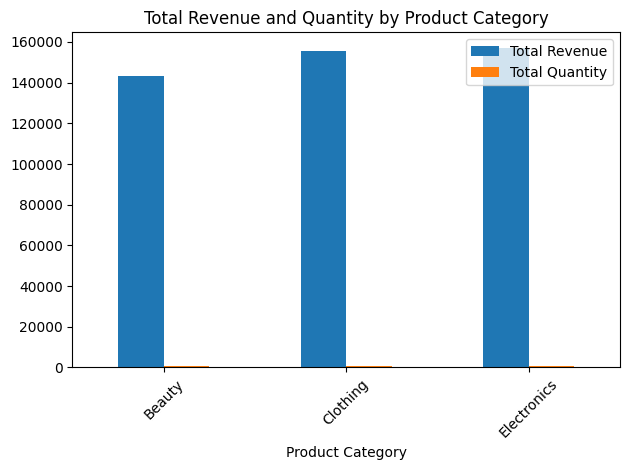

Customer Statistics:
       Total Spent  Average Transaction  Transaction Count         Age
count  1000.000000          1000.000000             1000.0  1000.00000
mean    456.000000           456.000000                1.0    41.39200
std     559.997632           559.997632                0.0    13.68143
min      25.000000            25.000000                1.0    18.00000
25%      60.000000            60.000000                1.0    29.00000
50%     135.000000           135.000000                1.0    42.00000
75%     900.000000           900.000000                1.0    53.00000
max    2000.000000          2000.000000                1.0    64.00000
Product Statistics:
  Product Category  Total Revenue  Total Quantity  Transaction Count  \
0           Beauty         143515             771                307   
1         Clothing         155580             894                351   
2      Electronics         156905             849                342   

   Average Price  
0     186.14

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Customer Analysis
customer_stats = df.groupby('Customer ID').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Age': 'first',
    'Gender': 'first'
}).reset_index()
customer_stats.columns = ['Customer ID', 'Total Spent', 'Average Transaction', 'Transaction Count', 'Age', 'Gender']

# Product Analysis
product_stats = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum',
    'Transaction ID': 'count'
}).reset_index()
product_stats.columns = ['Product Category', 'Total Revenue', 'Total Quantity', 'Transaction Count']
product_stats['Average Price'] = product_stats['Total Revenue'] / product_stats['Total Quantity']

# Gender-based analysis
gender_stats = df.groupby('Gender').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count',
    'Age': 'mean'
}).reset_index()
gender_stats.columns = ['Gender', 'Total Revenue', 'Transaction Count', 'Average Age']
gender_stats['Average Transaction'] = gender_stats['Total Revenue'] / gender_stats['Transaction Count']

# Age group analysis
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
age_group_stats = df.groupby('Age Group').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count',
    'Customer ID': 'nunique'
}).reset_index()
age_group_stats.columns = ['Age Group', 'Total Revenue', 'Transaction Count', 'Customer Count']
age_group_stats['Average Transaction'] = age_group_stats['Total Revenue'] / age_group_stats['Transaction Count']

# Visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=df)
plt.title('Distribution of Transaction Amounts by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('transaction_amount_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', hue='Gender', data=df)
plt.title('Relationship between Age, Gender, and Transaction Amount')
plt.tight_layout()
plt.savefig('age_gender_transaction.png')
plt.show()

plt.figure(figsize=(10, 6))
product_stats.plot(x='Product Category', y=['Total Revenue', 'Total Quantity'], kind='bar')
plt.title('Total Revenue and Quantity by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('product_performance.png')
plt.show()

# Print summary statistics
print("Customer Statistics:")
print(customer_stats.describe())

print("\
Product Statistics:")
print(product_stats)

print("\
Gender Statistics:")
print(gender_stats)

print("\
Age Group Statistics:")
print(age_group_stats)

print("Analysis completed.")

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

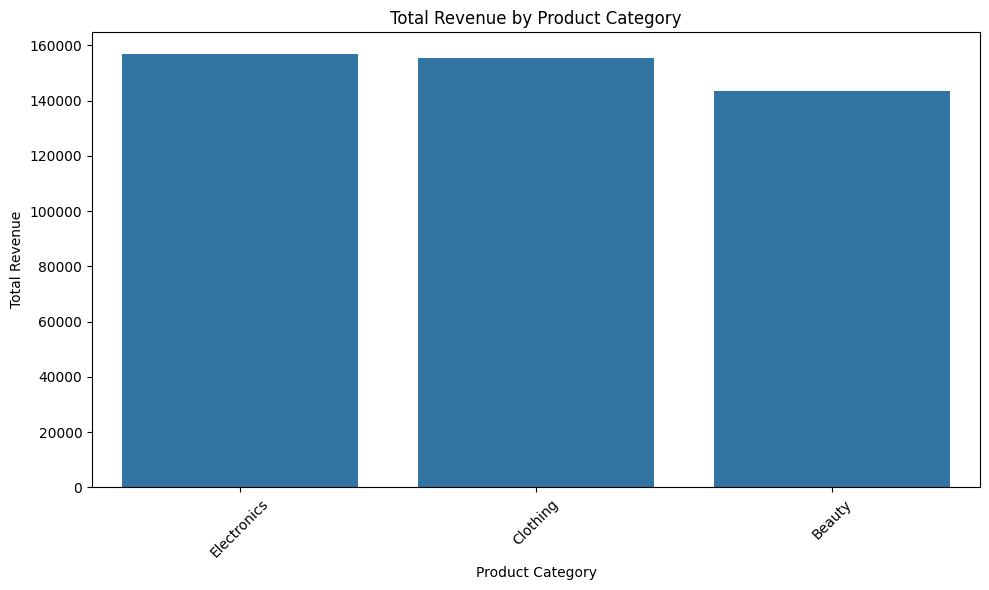

In [29]:
plt.figure(figsize=(10, 6))
product_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_category.png')
plt.show()

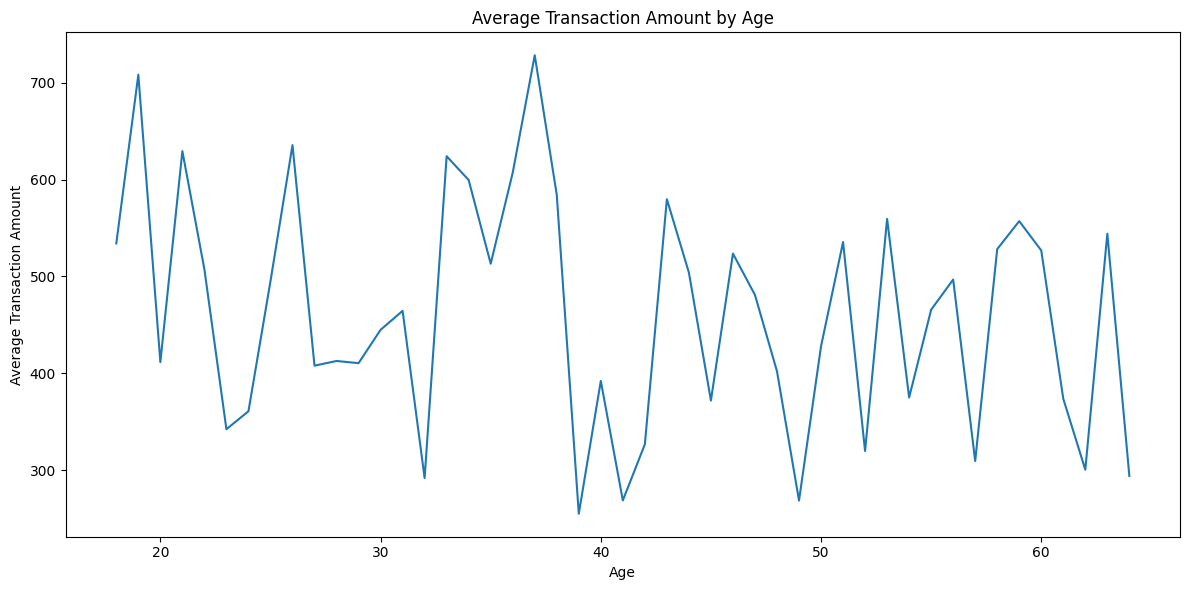

In [30]:
plt.figure(figsize=(12, 6))
age_transaction = df.groupby('Age')['Total Amount'].mean().sort_index()
plt.plot(age_transaction.index, age_transaction.values)
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.savefig('avg_transaction_by_age.png')
plt.show()

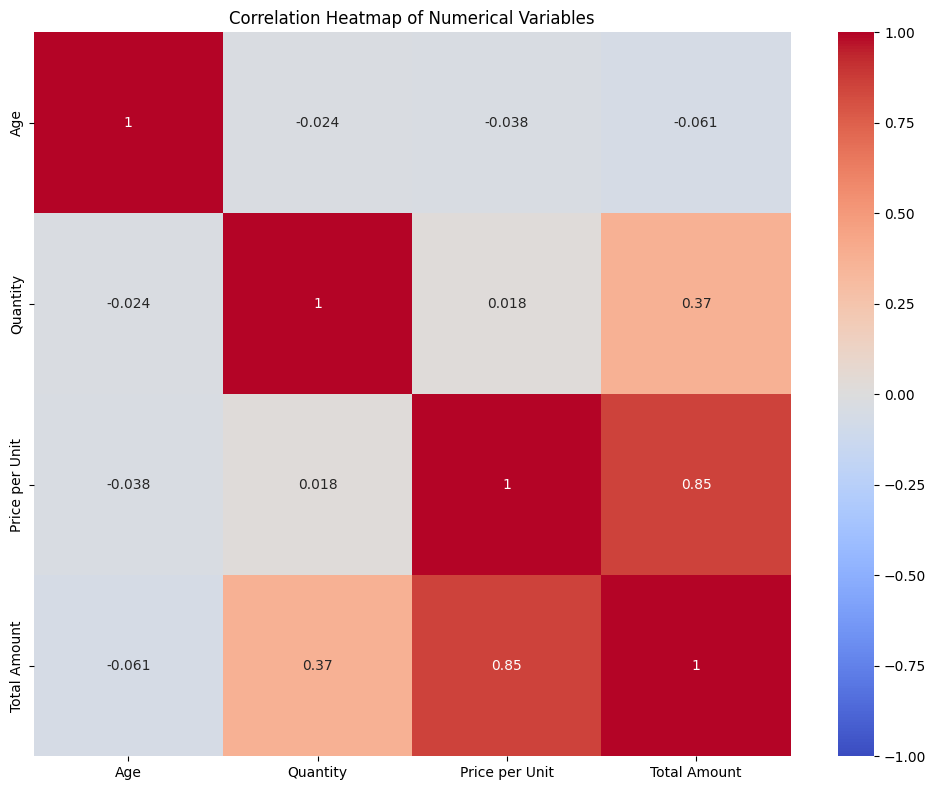

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


<Figure size 1200x600 with 0 Axes>

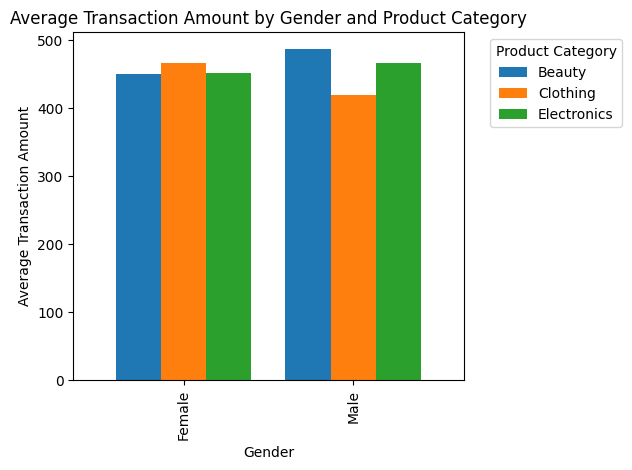

In [32]:
plt.figure(figsize=(12, 6))
gender_category_avg = df.groupby(['Gender', 'Product Category'])['Total Amount'].mean().unstack()
gender_category_avg.plot(kind='bar', width=0.8)
plt.title('Average Transaction Amount by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('avg_transaction_gender_category.png')
plt.show()

In [33]:
print("Visualizations created successfully.")

Visualizations created successfully.


Recommendations
Focus on High Revenue Product Categories:

Electronics, Clothing, and Beauty are the top-performing categories in terms of total revenue. Consider increasing inventory, marketing efforts, and promotions for these categories to maximize revenue.
Target Marketing by Age Group:

The 21-30 and 31-40 age groups have high average transaction values. Tailor marketing campaigns and promotions to these age groups to increase sales.
Improve Customer Retention:

The repeat purchase rate is currently 0.00%. Implement loyalty programs, personalized offers, and follow-up communications to encourage repeat purchases and improve customer retention.
Gender-Specific Promotions:

Analyze the average transaction amount by gender and product category to create targeted promotions. For example, if males spend more on electronics, consider offering special deals on electronics for male customers.
Optimize Pricing Strategy:

The average transaction value varies across product categories. Review pricing strategies to ensure competitiveness while maintaining profitability. Consider bundling products or offering discounts on bulk purchases.
Enhance Customer Experience:

Focus on improving the overall customer experience, including website usability, customer service, and delivery options. Satisfied customers are more likely to make repeat purchases and recommend the store to others.
By implementing these recommendations, the retail store can enhance its sales performance, improve customer satisfaction, and drive long-term growth.